In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tueplots import bundles

In [8]:
DATA_PATH = "../data/raw/"
OUTPUT_PATH = "output/" # if you want to save the plots

os.makedirs(OUTPUT_PATH, exist_ok=True)

In [9]:
cvd_data = pd.read_csv(DATA_PATH + "GBD_CVD_specific.csv")
cvd_data

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Number,1990,447.993749,552.112206,367.107295
1,Deaths,Thailand,Female,All ages,Other cardiovascular and circulatory diseases,Number,1990,393.834289,498.821302,330.140013
2,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Percent,1990,0.002523,0.003020,0.002138
3,Deaths,Thailand,Female,All ages,Other cardiovascular and circulatory diseases,Percent,1990,0.003120,0.003929,0.002691
4,Deaths,Thailand,Male,All ages,Other cardiovascular and circulatory diseases,Rate,1990,1.588415,1.957579,1.301622
...,...,...,...,...,...,...,...,...,...,...
403915,Deaths,Rwanda,Female,All ages,Non-rheumatic valvular heart disease,Number,2000,29.931091,45.978770,17.327946
403916,Deaths,Rwanda,Male,All ages,Non-rheumatic valvular heart disease,Percent,2000,0.000410,0.000615,0.000274
403917,Deaths,Rwanda,Female,All ages,Non-rheumatic valvular heart disease,Percent,2000,0.000559,0.000836,0.000319
403918,Deaths,Rwanda,Male,All ages,Non-rheumatic valvular heart disease,Rate,2000,0.593093,0.899302,0.398610


In [116]:
from tueplots.constants.color import rgb

from matplotlib.colors import LinearSegmentedColormap

cmap_colors = [
    (0.0, rgb.tue_blue),
    (0.5, rgb.tue_orange),
    (1.0, rgb.tue_red)
]

# Create a colormap object
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

# Create a linear segmented colormap
custom_cmap = LinearSegmentedColormap.from_list("tue_red_orange", [rgb.tue_red, rgb.tue_blue])
n_colors = 11  # You can adjust the number of colors in the palette
custom_colors = [custom_cmap(i / n_colors) for i in range(n_colors)]
custom_palette = sns.color_palette(custom_colors)

C:\Users\vojsy\AppData\Local\Temp\ipykernel_27060\4121479660.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=new_impact_data.values, y=new_impact_data.index, palette=custom_palette, orient='h')


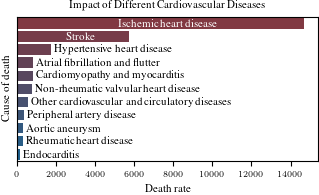

In [117]:
# Plotting with custom y-axis labels for the top two causes
# plt.figure(figsize=(10, 6))
ONLY_GERMANY = True
new_filtered_data = cvd_data[(cvd_data['metric'] == 'Rate') & (cvd_data['measure'] == 'Deaths')]
if ONLY_GERMANY:
    new_filtered_data = new_filtered_data[new_filtered_data['location'] == 'Germany']
new_impact_data = new_filtered_data.groupby('cause')['val'].sum().sort_values(ascending=False)

plt.rcParams.update(bundles.icml2022(column="half", ncols=2, nrows=1))
plt.rcParams["figure.figsize"] = (plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*2)
# mypalette = sns.color_palette([rgb.tue_blue, rgb.tue_orange, rgb.tue_red])
barplot = sns.barplot(x=new_impact_data.values, y=new_impact_data.index, palette=custom_palette, orient='h')

# Remove the y-axis labels
plt.yticks([])  # This removes the x-tick labels since they now correspond to the values previously on the y-axis

# Get the two largest cause indices for conditional labeling
top_two_indices = new_impact_data.nlargest(2).index

# Customize y-axis labels, placing them inside the bars for the top two causes and higher outside for the others
for i, bar in enumerate(barplot.patches):
    cause = new_impact_data.index[i]
    label_y_pos = bar.get_y() + bar.get_height() / 2

    if cause in top_two_indices:
        # Label inside the bar for top two causes
        label_x_pos = bar.get_width()*0.7   # Slightly inside the end of the bar
        label_color = 'white'
        ha_alignment = 'right'
    else:
        # Label outside the bar for other causes, to the right of the bar
        label_x_pos = bar.get_width() + (max(new_impact_data.values) * 0.01)  # Slightly outside the bar
        label_color = 'black'
        ha_alignment = 'left'

    plt.text(label_x_pos, label_y_pos,
             cause,
             va='center',
             ha=ha_alignment,
             color=label_color)
    
# Set the title
plt.title('Impact of Different Cardiovascular Diseases')
plt.xlabel('Death rate')
plt.ylabel('Cause of death')

# Disable scientific notation for the x-axis labels
# plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)

plt.savefig("../doc/IHD_germany_2024/fig/fig_ImpactOfDifferentCVDs.pdf")
plt.show()

C:\Users\vojsy\AppData\Local\Temp\ipykernel_27060\2799078935.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=new_impact_data.index, y=new_impact_data.values, palette='viridis')


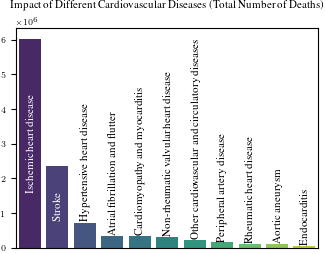

In [86]:
# Assuming 'new_impact_data' is already sorted in descending order
# and contains the data for a bar plot
# Your existing code for filtering and grouping the data
ONLY_GERMANY = True
new_filtered_data = cvd_data[(cvd_data['metric'] == 'Number') & (cvd_data['measure'] == 'Deaths')]
if ONLY_GERMANY:
    new_filtered_data = new_filtered_data[new_filtered_data['location'] == 'Germany']
new_impact_data = new_filtered_data.groupby('cause')['val'].sum().sort_values(ascending=False)

# Plotting with custom x-axis labels for the top two causes
plt.rcParams.update(bundles.icml2022(column="half", ncols=2, nrows=1))
plt.rcParams["figure.figsize"] = (plt.rcParams["figure.figsize"][0], 2.6)
barplot = sns.barplot(x=new_impact_data.index, y=new_impact_data.values, palette='viridis')

# Set the title
plt.title('Impact of Different Cardiovascular Diseases (Total Number of Deaths)')

# Remove the y-axis labels
plt.xticks([])  # This removes the y-tick labels
plt.xlabel('')  # This removes the y-axis label

# Get the two largest cause indices for conditional labeling
top_two_indices = new_impact_data.nlargest(2).index

# Customize x-axis labels, placing them inside the bars for the top two causes and higher outside for the others
for i, bar in enumerate(barplot.patches):
    label_x_pos = bar.get_x() + bar.get_width() / 2
    cause = new_impact_data.index[i]

    if cause in top_two_indices:
        # Label inside the bar for top two causes
        label_y_pos = (bar.get_height() / 2)
        label_color = 'white'
        va_alignment = 'center'
    else:
        # Label outside the bar for other causes, slightly higher than before
        label_y_pos = bar.get_height() + bar.get_height() * 0.05  # Move the label higher
        label_color = 'black'
        va_alignment = 'bottom'

    plt.text(label_x_pos, label_y_pos,
             cause,
             ha='center',
             va=va_alignment,
             rotation=90,
             color=label_color)

# plt.tight_layout()
plt.show()

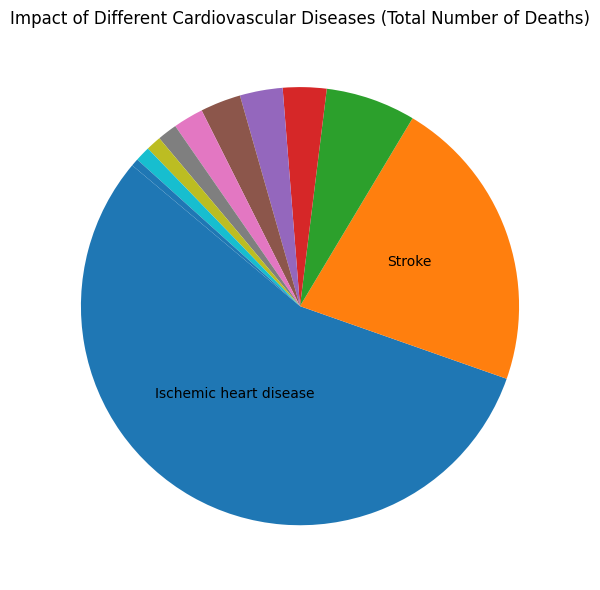

In [11]:
# Plotting as a pie chart without percentages and with two internal labels
plt.figure(figsize=(10, 6))
wedges, _ = plt.pie(new_impact_data, startangle=140)

# Getting the two largest portions
largest_indices = new_impact_data.argsort()[-2:]

plt.text(-0.3, -0.4, "Ischemic heart disease", ha='center', va='center')
plt.text(0.5, 0.2, "Stroke", ha='center', va='center')

plt.title('Impact of Different Cardiovascular Diseases (Total Number of Deaths)')

plt.tight_layout()
plt.show()